In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_path = "C:/Users/lenovo/Desktop/Demand_Analysis_Model/data/raw/train.csv"

train = pd.read_csv(train_path)

print("Train shape:", train.shape)

print("\nTrain head:")
print(train.head())

print("\nTrain dtypes:")
print(train.dtypes)


Train shape: (913000, 4)

Train head:
         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

Train dtypes:
date     object
store     int64
item      int64
sales     int64
dtype: object


In [6]:
train["date"] = pd.to_datetime(train["date"])
print("\nTrain describe:")
print(train.describe())

print("\nMissing values in train:")
print(train.isnull().sum())



Train describe:
                                date          store           item  \
count                         913000  913000.000000  913000.000000   
mean   2015-07-02 11:59:59.999999744       5.500000      25.500000   
min              2013-01-01 00:00:00       1.000000       1.000000   
25%              2014-04-02 00:00:00       3.000000      13.000000   
50%              2015-07-02 12:00:00       5.500000      25.500000   
75%              2016-10-01 00:00:00       8.000000      38.000000   
max              2017-12-31 00:00:00      10.000000      50.000000   
std                              NaN       2.872283      14.430878   

               sales  
count  913000.000000  
mean       52.250287  
min         0.000000  
25%        30.000000  
50%        47.000000  
75%        70.000000  
max       231.000000  
std        28.801144  

Missing values in train:
date     0
store    0
item     0
sales    0
dtype: int64


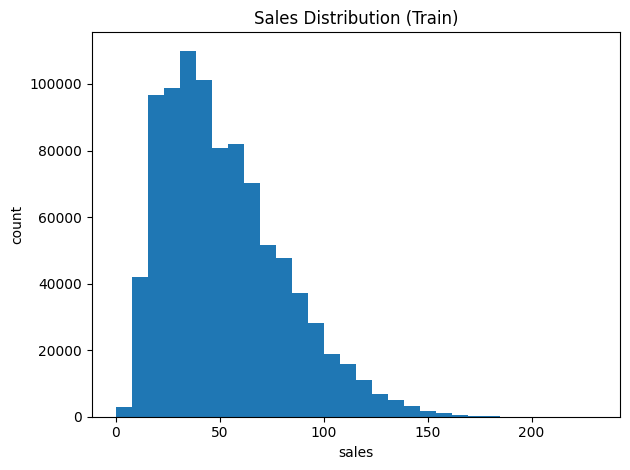

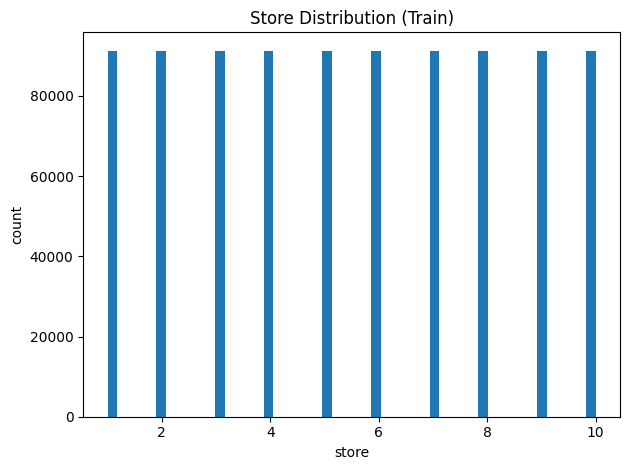

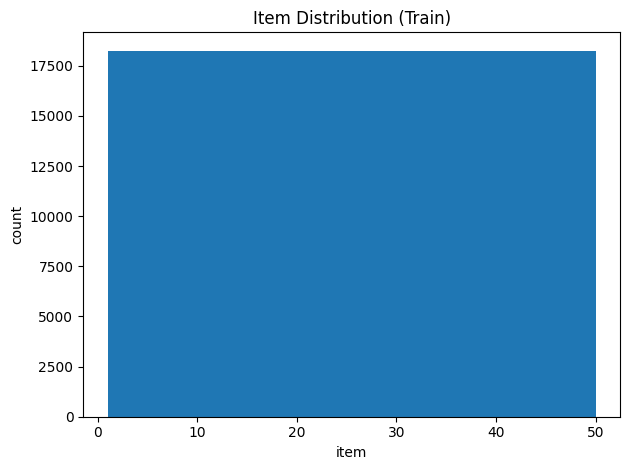

In [7]:
plt.figure()
plt.hist(train["sales"], bins=30)
plt.title("Sales Distribution (Train)")
plt.xlabel("sales")
plt.ylabel("count")
plt.tight_layout()
plt.show()

# توزيع عدد المتاجر
plt.figure()
plt.hist(train["store"], bins=50)
plt.title("Store Distribution (Train)")
plt.xlabel("store")
plt.ylabel("count")
plt.tight_layout()
plt.show()

# توزيع عدد الأصناف
plt.figure()
plt.hist(train["item"], bins=50)
plt.title("Item Distribution (Train)")
plt.xlabel("item")
plt.ylabel("count")
plt.tight_layout()
plt.show()


In [8]:
train["year"] = train["date"].dt.year
train["month"] = train["date"].dt.month
train["day"] = train["date"].dt.day
train["dayofweek"] = train["date"].dt.dayofweek  # Monday=0

print("\nTrain with date features head:")
print(train.head())


Train with date features head:
        date  store  item  sales  year  month  day  dayofweek
0 2013-01-01      1     1     13  2013      1    1          1
1 2013-01-02      1     1     11  2013      1    2          2
2 2013-01-03      1     1     14  2013      1    3          3
3 2013-01-04      1     1     13  2013      1    4          4
4 2013-01-05      1     1     10  2013      1    5          5


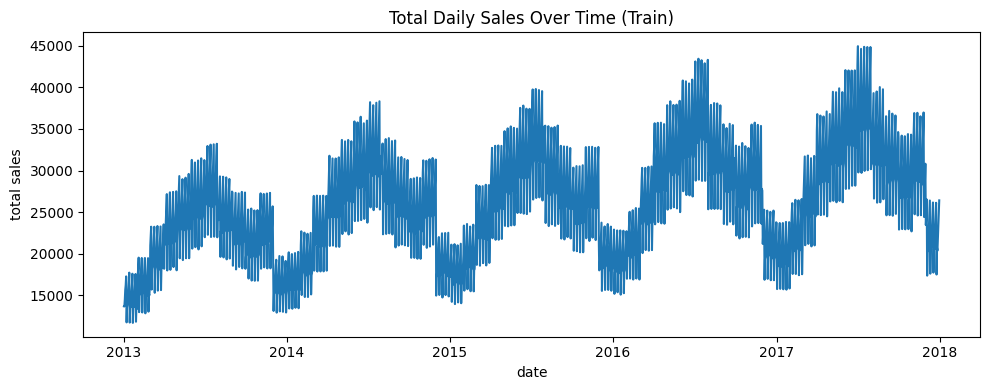

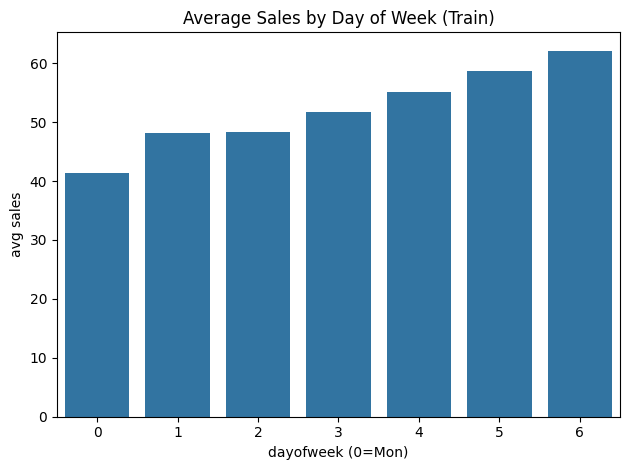

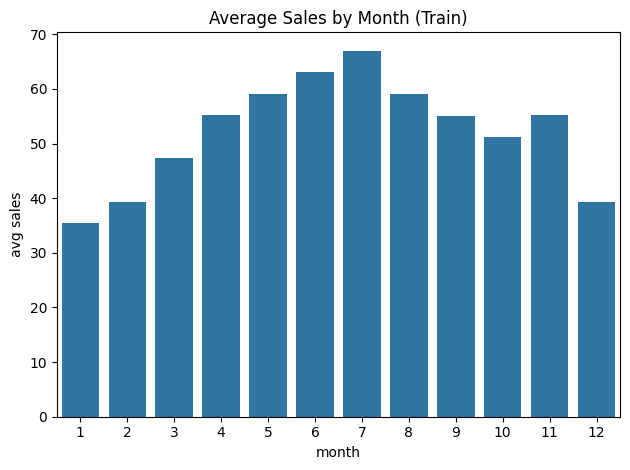

In [9]:
daily_sales = train.groupby("date")["sales"].sum().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(daily_sales["date"], daily_sales["sales"])
plt.title("Total Daily Sales Over Time (Train)")
plt.xlabel("date")
plt.ylabel("total sales")
plt.tight_layout()
plt.show()

dow_sales = train.groupby("dayofweek")["sales"].mean().reset_index()

plt.figure()
sns.barplot(data=dow_sales, x="dayofweek", y="sales")
plt.title("Average Sales by Day of Week (Train)")
plt.xlabel("dayofweek (0=Mon)")
plt.ylabel("avg sales")
plt.tight_layout()
plt.show()

month_sales = train.groupby("month")["sales"].mean().reset_index()

plt.figure()
sns.barplot(data=month_sales, x="month", y="sales")
plt.title("Average Sales by Month (Train)")
plt.xlabel("month")
plt.ylabel("avg sales")
plt.tight_layout()
plt.show()

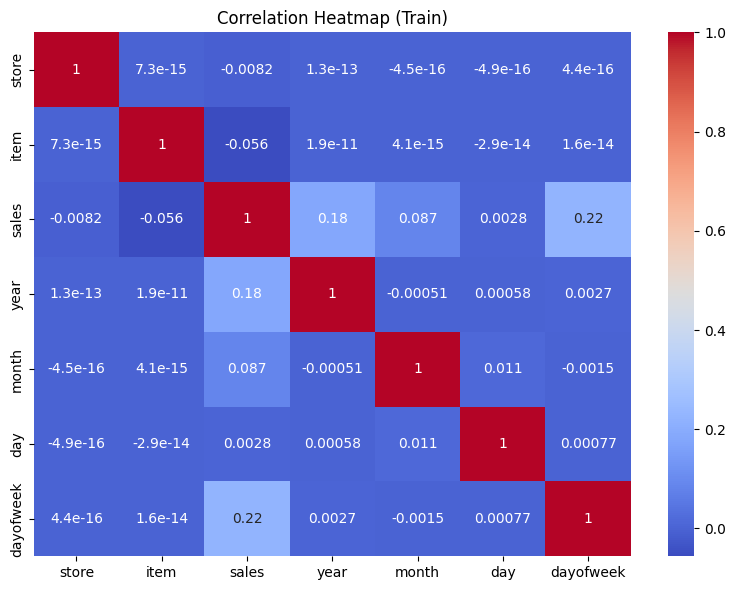


Correlation with sales:
sales        1.000000
dayofweek    0.222608
year         0.182360
month        0.087414
day          0.002791
store       -0.008170
item        -0.055998
Name: sales, dtype: float64


In [10]:
num_cols_train = ["store", "item", "sales", "year", "month", "day", "dayofweek"]
corr = train[num_cols_train].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Train)")
plt.tight_layout()
plt.show()

print("\nCorrelation with sales:")
print(corr["sales"].sort_values(ascending=False))

In [11]:
target_col = "sales"

feature_cols = [
    "store",
    "item",
    "year",
    "month",
    "day",
    "dayofweek",
]

X_train = train[feature_cols].values
y_train = train[target_col].values

print("\nFinal shapes for training only:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)


Final shapes for training only:
X_train: (913000, 6)
y_train: (913000,)
